<h3>Read in the dataset.</h3><br>
Importing appropriate libraries, setting Panda print options and reading in the file as a dataset.

In [1]:
# Import libraries

import pandas                  as pd                      # data science essentials
import matplotlib.pyplot       as plt                     # essential graphical output
import seaborn                 as sns                     # enhanced graphical outputimport pandas as pd
import statsmodels.formula.api as smf                     # regression modeling

from   sklearn.model_selection import train_test_split    # train/test split
from   sklearn.linear_model    import LinearRegression    # linear regression (scikit-learn)
import sklearn.linear_model
from   sklearn.neighbors       import KNeighborsRegressor # KNN for Regression
from   sklearn.preprocessing   import StandardScaler      # standard scaler

# Set pandas print options

pd.set_option('display.max_rows'   , 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width'      , 1000)

# Specify file name
file = 'Apprentice_Chef_Dataset.xlsx'


# Read the file into Python
chefdf = pd.read_excel(file)

<h3>Data exploration</h3><br>
Making the dataset visible in various way to explore the data

In [2]:
# Display information about each variable
chefdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
PC_LOGINS                       1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
W

In [3]:
# Descriptive statistics
chefdf.describe().round(2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,35.41,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,26.58,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,0.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,10.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,30.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,60.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,90.00,564.20,11.00,3.00,5.00,19.00,1600.00


<h3>Missing value analysis</h3><br>

In [4]:
# Check column wise for missing values and then add the values together.
chefdf.isnull().sum()

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
PC_LOGINS                        0
MOBILE_LOGINS                    0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

Last names have a high rate of missing values and could be considered to be imputed. Last names and first names, however, are not relevant when looking into predicting revenue and are likely not very good features for the model. Therefore both columns "First Name" and "Family Name" will be removed from the dataset and no imputation will be necessary.

<h3>Feature Engineering</h3><br>
Building a base model and analyzing it by running an overall regression summary.

In [5]:
# Building a base model

# Blueprinting a model type
lm_price_qual = smf.ols(formula = """REVENUE ~  chefdf['CROSS_SELL_SUCCESS']           +
                                                chefdf['TOTAL_MEALS_ORDERED']          +
                                                chefdf['UNIQUE_MEALS_PURCH']           +
                                                chefdf['CONTACTS_W_CUSTOMER_SERVICE']  +
                                                chefdf['PRODUCT_CATEGORIES_VIEWED']    +
                                                chefdf['AVG_TIME_PER_SITE_VISIT']      +
                                                chefdf['MOBILE_NUMBER']                +
                                                chefdf['CANCELLATIONS_BEFORE_NOON']    +
                                                chefdf['CANCELLATIONS_AFTER_NOON']     +
                                                chefdf['TASTES_AND_PREFERENCES']       +
                                                chefdf['MOBILE_LOGINS']                +
                                                chefdf['PC_LOGINS']                    +
                                                chefdf['WEEKLY_PLAN']                  +
                                                chefdf['EARLY_DELIVERIES']             +
                                                chefdf['LATE_DELIVERIES']              +
                                                chefdf['PACKAGE_LOCKER']               +
                                                chefdf['REFRIGERATED_LOCKER']          +
                                                chefdf['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                                chefdf['AVG_PREP_VID_TIME']            +
                                                chefdf['LARGEST_ORDER_SIZE']           +
                                                chefdf['MASTER_CLASSES_ATTENDED']      +
                                                chefdf['MEDIAN_MEAL_RATING']           +
                                                chefdf['AVG_CLICKS_PER_VISIT']         +
                                                chefdf['TOTAL_PHOTOS_VIEWED']""",
                                                data = chefdf)


# Telling Python to run the data through the blueprint
results = lm_price_qual.fit()


# Printing the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     142.7
Date:                Sat, 07 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:40:47   Log-Likelihood:                -15460.
No. Observations:                1946   AIC:                         3.097e+04
Df Residuals:                    1921   BIC:                         3.111e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

The base model has a mediocre R-squared value of 0.64. There is much room for improvement and therefore an outlier and trend analysis will be performed.

<h3>Outlier Analysis</h3><br>
Outliers that may have an impact on the model are flagged for further investigation.

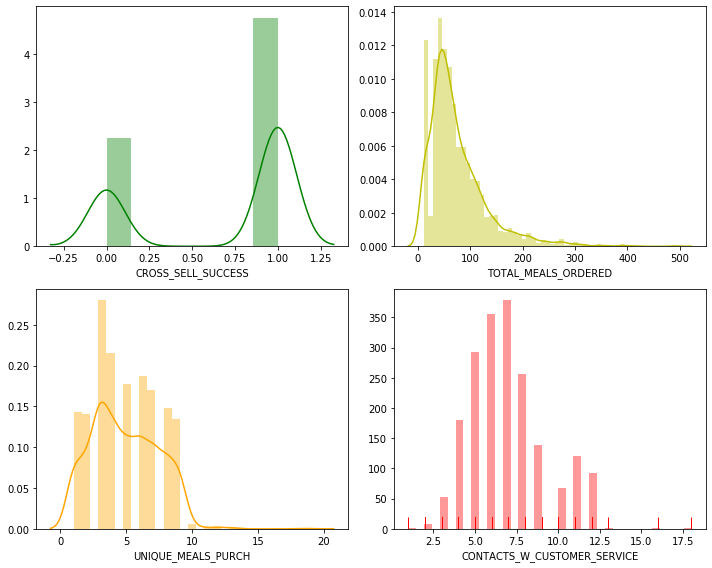

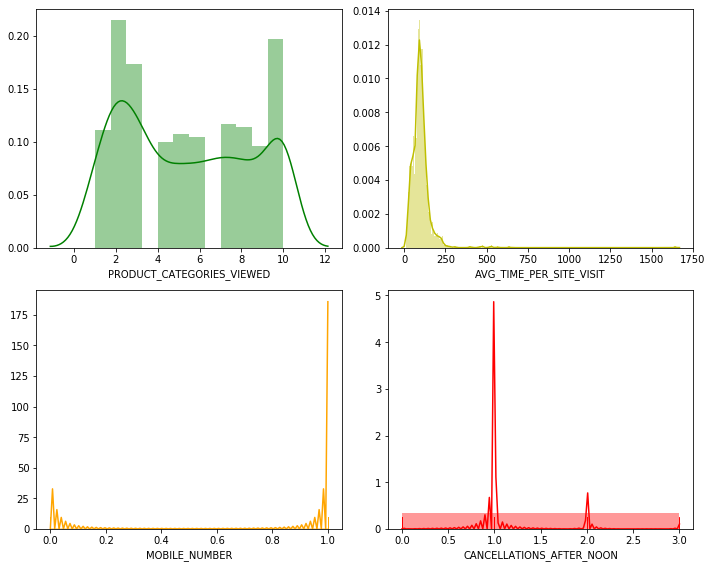

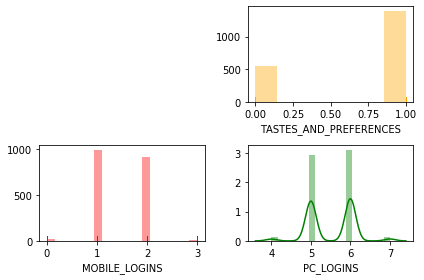

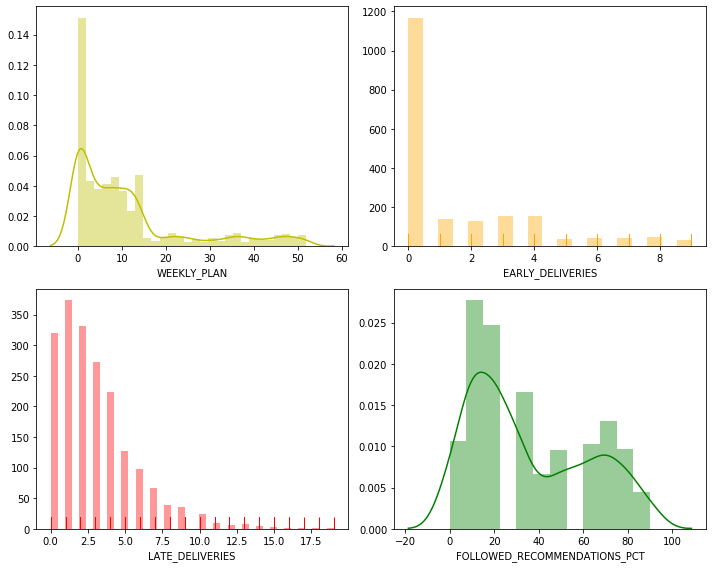

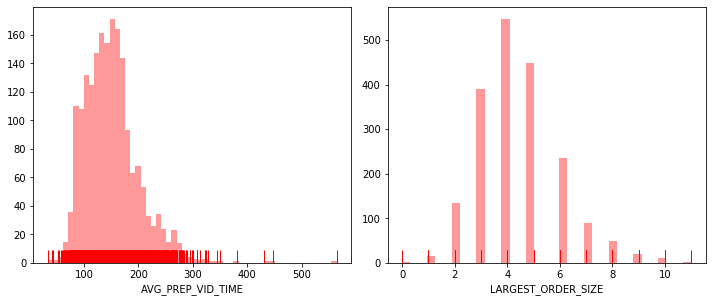

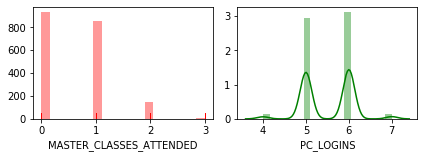

Text(0.5, 0, 'REFRIGERATED_LOCKER')

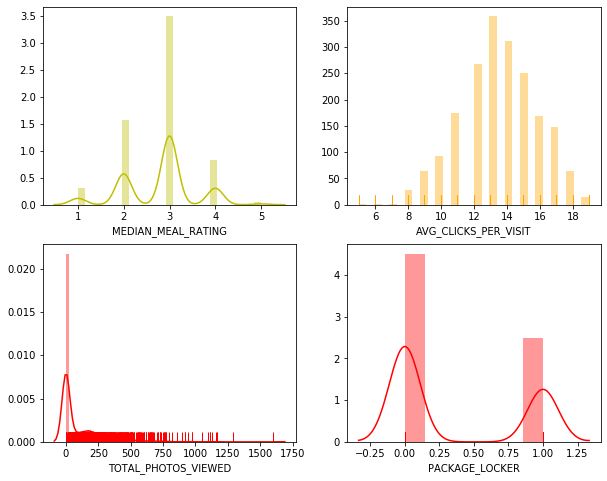

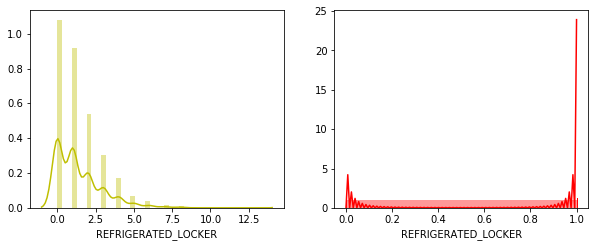

In [6]:
########################
# Visual EDA (Histograms)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chefdf['CROSS_SELL_SUCCESS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 2)
sns.distplot(chefdf['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.distplot(chefdf['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################
plt.subplot(2, 2, 4)
sns.distplot(chefdf['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.tight_layout()
plt.show()

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chefdf['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.distplot(chefdf['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.distplot(chefdf['MOBILE_NUMBER'],
             bins  = 'fd',
             kde   = True,
             rug   = True,
             color = 'orange')
plt.xlabel('MOBILE_NUMBER')

########################

plt.subplot(2, 2, 4)
sns.distplot(chefdf['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             kde   = True,
             rug   = True,
             color = 'r')
plt.xlabel('CANCELLATIONS_AFTER_NOON')
plt.tight_layout()
plt.show()

########################

plt.subplot(2, 2, 2)
sns.distplot(chefdf['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 3)
sns.distplot(chefdf['MOBILE_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MOBILE_LOGINS')

########################

plt.subplot(2, 2, 4)
sns.distplot(chefdf['PC_LOGINS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PC_LOGINS')
plt.tight_layout()
plt.show()

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chefdf['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 2)
sns.distplot(chefdf['EARLY_DELIVERIES'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'orange')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.distplot(chefdf['LATE_DELIVERIES'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('LATE_DELIVERIES')

########################

plt.subplot(2, 2, 4)
sns.distplot(chefdf['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')
plt.tight_layout()
plt.show()

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chefdf['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 2)
sns.distplot(chefdf['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('LARGEST_ORDER_SIZE')
plt.tight_layout()
plt.show()

########################

plt.subplot(2, 2, 3)
sns.distplot(chefdf['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MASTER_CLASSES_ATTENDED')

########################

plt.subplot(2, 2, 4)
sns.distplot(chefdf['PC_LOGINS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PC_LOGINS')
plt.tight_layout()
plt.show()

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chefdf['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('MEDIAN_MEAL_RATING')

########################

plt.subplot(2, 2, 2)
sns.distplot(chefdf['AVG_CLICKS_PER_VISIT'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'orange')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################

plt.subplot(2, 2, 3)
sns.distplot(chefdf['TOTAL_PHOTOS_VIEWED'],
             bins = 'fd',
             kde  = True,
             rug  = True,
             color = 'r')
plt.xlabel('TOTAL_PHOTOS_VIEWED')

########################

plt.subplot(2, 2, 4)
sns.distplot(chefdf['PACKAGE_LOCKER'],
             bins = 'fd',
             rug  = True,
             color = 'r')
plt.xlabel('PACKAGE_LOCKER')

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chefdf['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')
########################

plt.xlabel('REFRIGERATED_LOCKER')
plt.subplot(2, 2, 2)
sns.distplot(chefdf['REFRIGERATED_LOCKER'],
             bins = 'fd',
             kde  = True,
             rug  = True,
             color = 'r')
plt.xlabel('REFRIGERATED_LOCKER')

########################

**Setting outlier thresholds will be performed in the code below.**

**Following assumptions and actions were made:**

CROSS_SELL_SUCCESS is binary and will be used entirely without making treshholds.
CONTACTS_W_CUSTOMER_SERVICE has two particular groupings shaped as normal distributions. The first grouping, by far the    biggest, was considered for this project. Optional extra analysis would be including the second grouping.

MOBILE_NUMBER is binary and will be used entirely for the model.
CANCELLATIONS_BEFORE_NOON has four categories; zero, one , two and three. This variable will be used entirely for this model.
CANCELLATIONS_AFTER_NOON has four categories; zero, one , two and three This variable will be used entirely for this model.
TASTES_AND_PREFERENCES is binary and shall be used entirely.
MOBILE_LOGINS four categories of which one and two may be more relevant. No outliers were flagged for this variabe.
PC_LOGINS four categories; four,five,six and seven. No outliers were flagged for this variabe. PRODUCT_CATEGORIES_VIEWED wil be used entirely. FOLLOWED_RECOMMENDATIONS_PCT has multiple groupings so the model will cover all of them without thresholds.
PACKAGE_LOCKER and REFRIDGERATED_LOCKER are binary and will be used as a whole for the model without flagged outliers.
MASTER_CLASSES_ATTENDED and TOTAL_PHOTOS_VIEWED were used entirely without flagged outliers.

In [7]:
#TOTAL_MEALS_ORDERED
TOTAL_MEALS_ORDERED_lo = 30
TOTAL_MEALS_ORDERED_hi = 200

#UNIQUE_MEALS_PURCH
UNIQUE_MEALS_PURCH_lo = 1
UNIQUE_MEALS_PURCH_hi = 9

#CONTACTS_W_CUSTOMER_SERVICE
CONTACTS_W_CUSTOMER_SERVICE_lo = 4.0
CONTACTS_W_CUSTOMER_SERVICE_hi = 8.0

#AVG_TIME_PER_SITE_VISIT
AVG_TIME_PER_SITE_VISIT_lo = 0
AVG_TIME_PER_SITE_VISIT_hi = 200

#WEEKLY_PLAN
WEEKLY_PLAN_lo = 0
WEEKLY_PLAN_hi = 15

#EARLY_DELIVERIES
EARLY_DELIVERIES_lo = 0
EARLY_DELIVERIES_hi = 4 

#LATE_DELIVERIES
LATE_DELIVERIES_lo = 0
LATE_DELIVERIES_hi = 6

#AVG_PREP_VID_TIME
AVG_PREP_VID_TIME_lo = 100
AVG_PREP_VID_TIME_hi = 200

#LARGEST_ORDER_SIZE
LARGEST_ORDER_SIZE_lo = 2
LARGEST_ORDER_SIZE_hi = 6

#MEDIAN_MEAL_RATING
MEDIAN_MEAL_RATING_lo = 2
MEDIAN_MEAL_RATING_hi = 4

#AVG_CLICKS_PER_VISIT
AVG_CLICKS_PER_VISIT_lo = 11
AVG_CLICKS_PER_VISIT_hi = 17

##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# Developing features (columns) for outliers

# TOTAL_MEALS_ORDERED

chefdf['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = chefdf.loc[0:,'out_TOTAL_MEALS_ORDERED'][chefdf['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]
condition_lo = chefdf.loc[0:,'out_TOTAL_MEALS_ORDERED'][chefdf['TOTAL_MEALS_ORDERED'] < TOTAL_MEALS_ORDERED_lo]

chefdf['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chefdf['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# UNIQUE_MEALS_PURCH

chefdf['out_UNIQUE_MEALS_PURCH'] = 0
condition_hi = chefdf.loc[0:,'out_UNIQUE_MEALS_PURCH'][chefdf['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi]
condition_lo = chefdf.loc[0:,'out_UNIQUE_MEALS_PURCH'][chefdf['UNIQUE_MEALS_PURCH'] < UNIQUE_MEALS_PURCH_lo]

chefdf['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chefdf['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# CONTACTS_W_CUSTOMER_SERVICE

chefdf['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = chefdf.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][chefdf['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]
condition_lo = chefdf.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][chefdf['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_lo]

chefdf['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chefdf['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# AVG_TIME_PER_SITE_VISIT

chefdf['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = chefdf.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][chefdf['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]
condition_lo = chefdf.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][chefdf['AVG_TIME_PER_SITE_VISIT'] < AVG_TIME_PER_SITE_VISIT_lo]

chefdf['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chefdf['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# WEEKLY_PLAN

chefdf['out_WEEKLY_PLAN'] = 0
condition_hi = chefdf.loc[0:,'out_WEEKLY_PLAN'][chefdf['WEEKLY_PLAN'] > WEEKLY_PLAN_hi]
condition_lo = chefdf.loc[0:,'out_WEEKLY_PLAN'][chefdf['WEEKLY_PLAN'] < WEEKLY_PLAN_lo]

chefdf['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chefdf['out_WEEKLY_PLAN'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# EARLY_DELIVERIES
chefdf['out_EARLY_DELIVERIES'] = 0
condition_hi = chefdf.loc[0:,'out_EARLY_DELIVERIES'][chefdf['EARLY_DELIVERIES'] > EARLY_DELIVERIES_hi]
condition_lo = chefdf.loc[0:,'out_EARLY_DELIVERIES'][chefdf['EARLY_DELIVERIES'] < EARLY_DELIVERIES_lo]

chefdf['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chefdf['out_EARLY_DELIVERIES'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# LATE_DELIVERIES

chefdf['out_LATE_DELIVERIES'] = 0
condition_hi = chefdf.loc[0:,'out_LATE_DELIVERIES'][chefdf['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]
condition_lo = chefdf.loc[0:,'out_LATE_DELIVERIES'][chefdf['LATE_DELIVERIES'] < LATE_DELIVERIES_lo]

chefdf['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chefdf['out_LATE_DELIVERIES'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# AVG_PREP_VID_TIME

chefdf['out_AVG_PREP_VID_TIME'] = 0
condition_hi = chefdf.loc[0:,'out_AVG_PREP_VID_TIME'][chefdf['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]
condition_lo = chefdf.loc[0:,'out_AVG_PREP_VID_TIME'][chefdf['AVG_PREP_VID_TIME'] < AVG_PREP_VID_TIME_lo]

chefdf['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chefdf['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# LARGEST_ORDER_SIZE

chefdf['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = chefdf.loc[0:,'out_LARGEST_ORDER_SIZE'][chefdf['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_hi]
condition_lo = chefdf.loc[0:,'out_LARGEST_ORDER_SIZE'][chefdf['LARGEST_ORDER_SIZE'] < LARGEST_ORDER_SIZE_lo]

chefdf['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chefdf['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# MEDIAN_MEAL_RATING

chefdf['out_MEDIAN_MEAL_RATING'] = 0
condition_hi = chefdf.loc[0:,'out_MEDIAN_MEAL_RATING'][chefdf['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_hi]
condition_lo = chefdf.loc[0:,'out_MEDIAN_MEAL_RATING'][chefdf['MEDIAN_MEAL_RATING'] < MEDIAN_MEAL_RATING_lo]

chefdf['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chefdf['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# AVG_CLICKS_PER_VISIT

chefdf['out_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = chefdf.loc[0:,'out_AVG_CLICKS_PER_VISIT'][chefdf['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_hi]
condition_lo = chefdf.loc[0:,'out_AVG_CLICKS_PER_VISIT'][chefdf['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_lo]

chefdf['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chefdf['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

<h3>Trend Analysis</h3><br>
Developing trend based features

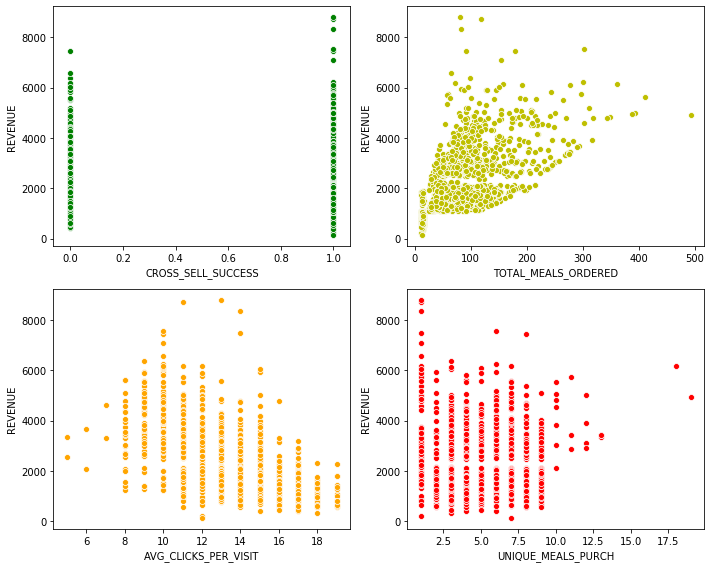

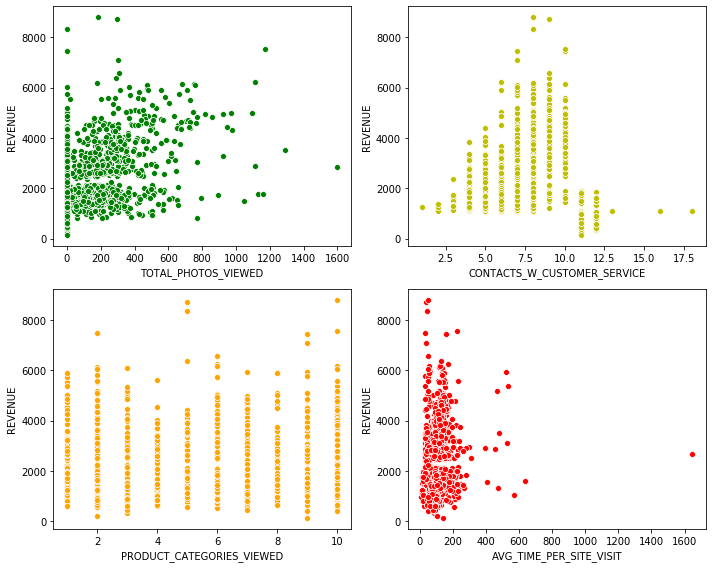

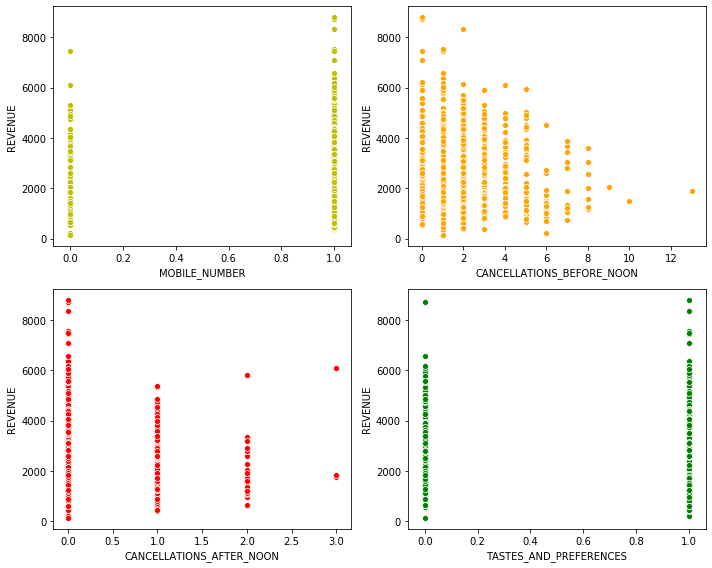

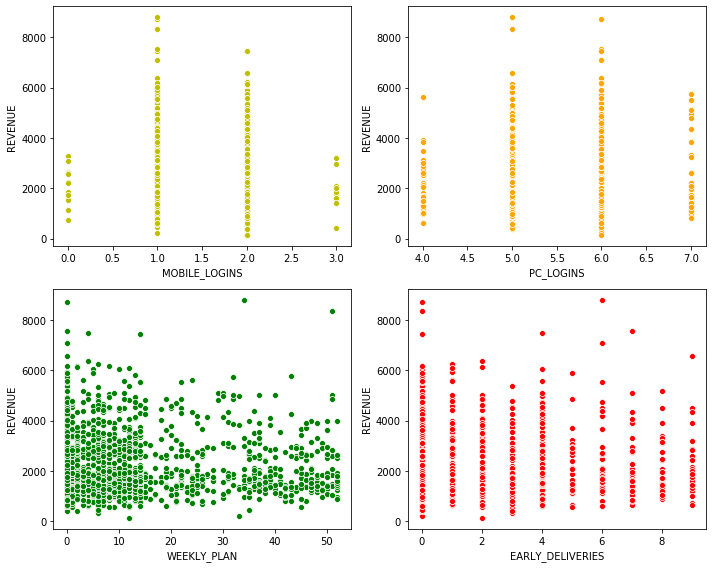

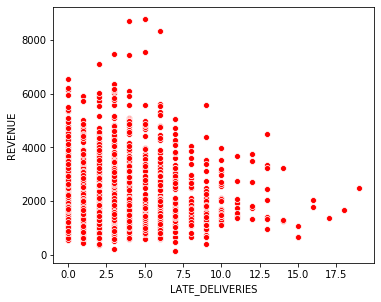

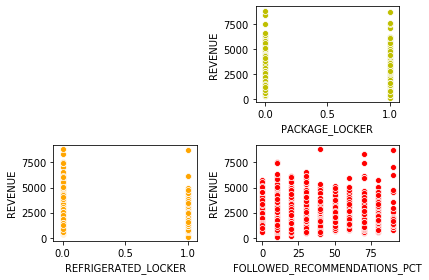

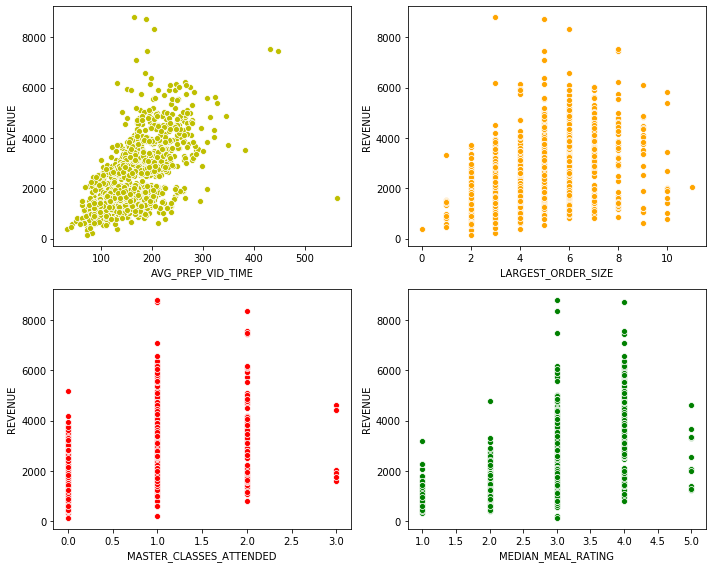

In [8]:
########################
# Visual EDA (Scatterplots)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chefdf['CROSS_SELL_SUCCESS'],
                y = chefdf['REVENUE'],
                color = 'g')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chefdf['TOTAL_MEALS_ORDERED'],
                y = chefdf['REVENUE'],
                color = 'y')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chefdf['AVG_CLICKS_PER_VISIT'],
                y = chefdf['REVENUE'],
                color = 'orange')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = chefdf['UNIQUE_MEALS_PURCH'],
                y = chefdf['REVENUE'],
                color = 'r')
plt.xlabel('UNIQUE_MEALS_PURCH')
plt.tight_layout()
plt.show()

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chefdf['TOTAL_PHOTOS_VIEWED'],
                y = chefdf['REVENUE'],
                color = 'g')
plt.xlabel('TOTAL_PHOTOS_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chefdf['CONTACTS_W_CUSTOMER_SERVICE'],
                y = chefdf['REVENUE'],
                color = 'y')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chefdf['PRODUCT_CATEGORIES_VIEWED'],
                y = chefdf['REVENUE'],
                color = 'orange')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = chefdf['AVG_TIME_PER_SITE_VISIT'],
                y = chefdf['REVENUE'],
                color = 'r')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')
plt.tight_layout()
plt.show()

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chefdf['MOBILE_NUMBER'],
                y = chefdf['REVENUE'],
                color = 'y')
plt.xlabel('MOBILE_NUMBER')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chefdf['CANCELLATIONS_BEFORE_NOON'],
                y = chefdf['REVENUE'],
                color = 'orange')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chefdf['CANCELLATIONS_AFTER_NOON'],
                y = chefdf['REVENUE'],
                color = 'r')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = chefdf['TASTES_AND_PREFERENCES'],
                y = chefdf['REVENUE'],
                color = 'g')
plt.xlabel('TASTES_AND_PREFERENCES')
plt.tight_layout()
plt.show()

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chefdf['MOBILE_LOGINS'],
                y = chefdf['REVENUE'],
                color = 'y')
plt.xlabel('MOBILE_LOGINS')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chefdf['PC_LOGINS'],
                y = chefdf['REVENUE'],
                color = 'orange')
plt.xlabel('PC_LOGINS')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chefdf['WEEKLY_PLAN'],
                y = chefdf['REVENUE'],
                color = 'g')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = chefdf['EARLY_DELIVERIES'],
                y = chefdf['REVENUE'],
                color = 'r')
plt.xlabel('EARLY_DELIVERIES')
plt.tight_layout()
plt.show()

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chefdf['LATE_DELIVERIES'],
                y = chefdf['REVENUE'],
                color = 'r')
plt.xlabel('LATE_DELIVERIES')
plt.tight_layout()
plt.show()
                
########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chefdf['PACKAGE_LOCKER'],
                y = chefdf['REVENUE'],
                color = 'y')
plt.xlabel('PACKAGE_LOCKER')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chefdf['REFRIGERATED_LOCKER'],
                y = chefdf['REVENUE'],
                color = 'orange')
plt.xlabel('REFRIGERATED_LOCKER')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = chefdf['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = chefdf['REVENUE'],
                color = 'r')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')
plt.tight_layout()
plt.show()

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chefdf['AVG_PREP_VID_TIME'],
                y = chefdf['REVENUE'],
                color = 'y')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chefdf['LARGEST_ORDER_SIZE'],
                y = chefdf['REVENUE'],
                color = 'orange')
plt.xlabel('LARGEST_ORDER_SIZE')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chefdf['MASTER_CLASSES_ATTENDED'],
                y = chefdf['REVENUE'],
                color = 'r')
plt.xlabel('MASTER_CLASSES_ATTENDED')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = chefdf['MEDIAN_MEAL_RATING'],
                y = chefdf['REVENUE'],
                color = 'g')
plt.xlabel('MEDIAN_MEAL_RATING')
plt.tight_layout()
plt.show()

########################

**Developing thresholds based on observations from scatterplots.**

**Assumptions and actions:**

CROSS_SELL_SUCCESS is binary and used entirely. 
AVG_CLICKS_PER_VISIT is used entirely even though there is a very thin presence of data before 8.
PRODUCT_CATEGORIES_VIEWED is used entirely as there is a continuous trend.
MOBILE_NUMBER this binary variable was used entirely.
TASTES_AND_PREFERENCES is used entirely without thresholds.
MOBILE_LOGINS was used entirely.
PC_LOGINS was used entirely.
EARLY_DELIVERIES was used entirely
PACKAGE_LOCKER this binary variable was used entirely.
REFRIGERATED_LOCKER this binary variable was used entirely.
No thresholds were placed for FOLLOWED_RECOMMENDATIONS_PCT and MASTER_CLASSES_ATTENDED .

In [9]:
# Setting trend-based thresholds

change_TOTAL_MEALS_ORDERED_hi            = 250 #Data scatters above this value
change_UNIQUE_MEALS_PURCH_hi             = 9   #Data scatters above this value
change_TOTAL_PHOTOS_VIEWED_hi            = 500 #Data scatters above this value
change_CONTACTS_W_CUSTOMER_SERVICE_hi    = 10  #Start of a downward trend then trend stops to flat line
change_AVG_TIME_PER_SITE_VISIT_hi        = 300 #Data scatters above this value 
change_CANCELLATIONS_BEFORE_NOON_hi      = 8   #Data scatters above this value
change_LATE_DELIVERIES_hi                = 10  #Data scatters above this value
change_AVG_PREP_VID_TIME_hi              = 290 #Data scatters above this value
change_LARGEST_ORDER_SIZE_hi             = 9   #Data scatters above this value
change_AVG_CLICKS_PER_VISIT_hi           = 10  #Starts from 8 to then and then has downward trend

# Change takes place at

change_MOBILE_NUMBER_at                  = 1 # According to graph it has more points present in higher revenue ranges for value = 1
change_TOTAL_PHOTOS_VIEWED_at            = 0 #strong concentration
change_WEEKLY_PLAN_at                    = 0 #High density around zero
change_TOTAL_PHOTOS_VIEWED_at            = 0 #heavy concentration
change_MEDIAN_MEAL_RATING_at             = 4 #discovered through categorical var analysis
change_UNIQUE_MEALS_PURCH_at             = 1 #strong concentration at 1 with some very high values for revenue
change_CANCELLATIONS_AFTER_NOON_at       = 0 #strongly zero inflated with some higher revenue values around zero

Develop trend based features, using earlier chosen tresholds.

In [10]:
# trend-based feature template

#change_TOTAL_MEALS_ORDERED_hi

chefdf['change_TOTAL_MEALS_ORDERED_hi'] = 0
condition = chefdf.loc[0:,'change_TOTAL_MEALS_ORDERED_hi'][chefdf['TOTAL_MEALS_ORDERED'] > change_TOTAL_MEALS_ORDERED_hi]

chefdf['change_TOTAL_MEALS_ORDERED_hi'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

#UNIQUE_MEALS_PURCH_hi
chefdf['change_UNIQUE_MEALS_PURCH_hi'] = 0
condition = chefdf.loc[0:,'change_UNIQUE_MEALS_PURCH_hi'][chefdf['UNIQUE_MEALS_PURCH'] > change_UNIQUE_MEALS_PURCH_hi]

chefdf['change_UNIQUE_MEALS_PURCH_hi'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

#change_TOTAL_PHOTOS_VIEWED_hi
chefdf['change_TOTAL_PHOTOS_VIEWED_hi'] = 0
condition = chefdf.loc[0:,'change_TOTAL_PHOTOS_VIEWED_hi'][chefdf['TOTAL_PHOTOS_VIEWED'] > change_TOTAL_PHOTOS_VIEWED_hi]

chefdf['change_TOTAL_PHOTOS_VIEWED_hi'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

#change_CONTACTS_W_CUSTOMER_SERVICE_hi
chefdf['change_CONTACTS_W_CUSTOMER_SERVICE_hi'] = 0
condition = chefdf.loc[0:,'change_CONTACTS_W_CUSTOMER_SERVICE_hi'][chefdf['CONTACTS_W_CUSTOMER_SERVICE'] > change_CONTACTS_W_CUSTOMER_SERVICE_hi]

chefdf['change_CONTACTS_W_CUSTOMER_SERVICE_hi'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)
#change_AVG_TIME_PER_SITE_VISIT_hi
chefdf['change_AVG_TIME_PER_SITE_VISIT_hi'] = 0
condition = chefdf.loc[0:,'change_AVG_TIME_PER_SITE_VISIT_hi'][chefdf['AVG_TIME_PER_SITE_VISIT'] > change_AVG_TIME_PER_SITE_VISIT_hi]

chefdf['change_AVG_TIME_PER_SITE_VISIT_hi'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

#change_CANCELLATIONS_BEFORE_NOON_hi
chefdf['change_CANCELLATIONS_BEFORE_NOON_hi'] = 0
condition = chefdf.loc[0:,'change_CANCELLATIONS_BEFORE_NOON_hi'][chefdf['CANCELLATIONS_BEFORE_NOON'] > change_CANCELLATIONS_BEFORE_NOON_hi]

chefdf['change_CANCELLATIONS_BEFORE_NOON_hi'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

#change_LATE_DELIVERIES_hi
chefdf['change_LATE_DELIVERIES_hi'] = 0
condition = chefdf.loc[0:,'change_LATE_DELIVERIES_hi'][chefdf['LATE_DELIVERIES'] > change_LATE_DELIVERIES_hi]

chefdf['change_LATE_DELIVERIES_hi'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

#change_AVG_PREP_VID_TIME_hi
chefdf['change_AVG_PREP_VID_TIME_hi'] = 0
condition = chefdf.loc[0:,'change_AVG_PREP_VID_TIME_hi'][chefdf['AVG_PREP_VID_TIME'] > change_AVG_PREP_VID_TIME_hi]

chefdf['change_AVG_PREP_VID_TIME_hi'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

#change_LARGEST_ORDER_SIZE_hi
chefdf['change_LARGEST_ORDER_SIZE_hi'] = 0
condition = chefdf.loc[0:,'change_LARGEST_ORDER_SIZE_hi'][chefdf['LARGEST_ORDER_SIZE'] > change_LARGEST_ORDER_SIZE_hi]

chefdf['change_LARGEST_ORDER_SIZE_hi'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

#change_AVG_CLICKS_PER_VISIT_hi
chefdf['change_AVG_CLICKS_PER_VISIT_hi'] = 0
condition = chefdf.loc[0:,'change_AVG_CLICKS_PER_VISIT_hi'][chefdf['AVG_CLICKS_PER_VISIT'] > change_AVG_CLICKS_PER_VISIT_hi]

chefdf['change_AVG_CLICKS_PER_VISIT_hi'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

########################################
## change at threshold                ##
########################################

#change_MOBILE_NUMBER_at

chefdf['change_MOBILE_NUMBER_at'] = 0
condition = chefdf.loc[0:,'change_MOBILE_NUMBER_at'][chefdf['MOBILE_NUMBER'] == change_MOBILE_NUMBER_at ]

chefdf['change_MOBILE_NUMBER_at'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

#change_TOTAL_PHOTOS_VIEWED_at

chefdf['change_TOTAL_PHOTOS_VIEWED_at'] = 0
condition = chefdf.loc[0:,'change_TOTAL_PHOTOS_VIEWED_at'][chefdf['TOTAL_PHOTOS_VIEWED'] == change_TOTAL_PHOTOS_VIEWED_at ]

chefdf['change_TOTAL_PHOTOS_VIEWED_at'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)


#change_WEEKLY_PLAN_change_at

chefdf['change_WEEKLY_PLAN_at'] = 0
condition = chefdf.loc[0:,'change_WEEKLY_PLAN_at'][chefdf['WEEKLY_PLAN'] == change_WEEKLY_PLAN_at ]

chefdf['change_WEEKLY_PLAN_at'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

#change_TOTAL_PHOTOS_VIEWED_at

chefdf['change_TOTAL_PHOTOS_VIEWED_at'] = 0
condition = chefdf.loc[0:,'change_TOTAL_PHOTOS_VIEWED_at'][chefdf['TOTAL_PHOTOS_VIEWED'] == change_TOTAL_PHOTOS_VIEWED_at ]

chefdf['change_TOTAL_PHOTOS_VIEWED_at'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)
#change_UNIQUE_MEALS_PURCH_at

chefdf['change_UNIQUE_MEALS_PURCH_at'] = 0
condition = chefdf.loc[0:,'change_UNIQUE_MEALS_PURCH_at'][chefdf['UNIQUE_MEALS_PURCH'] == change_UNIQUE_MEALS_PURCH_at ]

chefdf['change_UNIQUE_MEALS_PURCH_at'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

#change_MEDIAN_MEAL_RATING_at

chefdf['change_MEDIAN_MEAL_RATING_at'] = 0
condition = chefdf.loc[0:,'change_MEDIAN_MEAL_RATING_at'][chefdf['MEDIAN_MEAL_RATING'] == change_MEDIAN_MEAL_RATING_at ]

chefdf['change_MEDIAN_MEAL_RATING_at'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)
#change_CANCELLATIONS_AFTER_NOON_at
chefdf['change_CANCELLATIONS_AFTER_NOON_at'] = 0
condition = chefdf.loc[0:,'change_CANCELLATIONS_AFTER_NOON_at'][chefdf['CANCELLATIONS_AFTER_NOON'] == change_CANCELLATIONS_AFTER_NOON_at ]

chefdf['change_CANCELLATIONS_AFTER_NOON_at'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

<h3>Feature Engineering - Encoding Categorical Data</h3><br>

 The variables which were considered categorical were printed below.

In [11]:
# printing columns
print(f"""

#EMAIL
{chefdf['EMAIL'].value_counts()}

#UNIQUE_MEALS_PURCH
{chefdf['UNIQUE_MEALS_PURCH'].value_counts()}

#PACKAGE_LOCKER
{chefdf['PACKAGE_LOCKER'].value_counts()}

#REFRIGERATED_LOCKER
{chefdf['TASTES_AND_PREFERENCES'].value_counts()}

#TASTES_AND_PREFERENCES
{chefdf['TASTES_AND_PREFERENCES'].value_counts()}

#PRODUCT_CATEGORIES_VIEWED
{chefdf['PRODUCT_CATEGORIES_VIEWED'].value_counts()}

#MEDIAN_MEAL_RATING
{chefdf['MEDIAN_MEAL_RATING'].value_counts()}
""")



#EMAIL
cadwyn@gmail.com                   1
addison.hill@msn.com               1
larraq@protonmail.com              1
varys@yahoo.com                    1
grey.worm@yahoo.com                1
                                  ..
theomar.smallwood@nike.com         1
sedgekins@chevron.com              1
delonne.allyrion@protonmail.com    1
robert.ashford@ibm.com             1
bump@gmail.com                     1
Name: EMAIL, Length: 1946, dtype: int64

#UNIQUE_MEALS_PURCH
3     338
4     260
6     226
5     214
7     205
8     179
1     173
2     170
9     162
10      7
12      4
13      3
11      3
19      1
18      1
Name: UNIQUE_MEALS_PURCH, dtype: int64

#PACKAGE_LOCKER
0    1255
1     691
Name: PACKAGE_LOCKER, dtype: int64

#REFRIGERATED_LOCKER
1    1390
0     556
Name: TASTES_AND_PREFERENCES, dtype: int64

#TASTES_AND_PREFERENCES
1    1390
0     556
Name: TASTES_AND_PREFERENCES, dtype: int64

#PRODUCT_CATEGORIES_VIEWED
2     313
10    287
3     253
7     170
8     166
1     162
5

FIRST_NAME and FAMILY_NAME were assumed categorical values. However, assuming that the family names are not linked to corporate entities and are only related to indivduals, the FAMILY_NAME and FIRST_NAME should not be dominant features, which is why they were removed from the code for optimization purposes.

The e-mails have potential to separate groups of customers that may be more relevant to revenue.

<h3>Investigating categorical variables</h3><br>

UNIQUE_MEALS_PURCH

A value counts was performed to evaluate the amount of instances unique meals were bought per their individual categories.
A boxplot was plotted to see the inpact of individual meals on the revenue.

In [12]:
print(f"""

{chefdf['UNIQUE_MEALS_PURCH'].value_counts()}

""")



3     338
4     260
6     226
5     214
7     205
8     179
1     173
2     170
9     162
10      7
12      4
13      3
11      3
19      1
18      1
Name: UNIQUE_MEALS_PURCH, dtype: int64




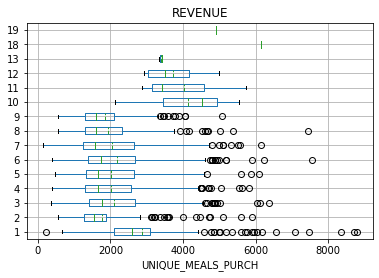

In [13]:
def categorical_boxplots(response, cat_var, data):
    """

	PARAMETERS
	----------
	response : REVENUE
	cat_var  : UNIQUE_MEALS_PURCH
	data     : chefdf
	"""

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)

    plt.suptitle("")
    plt.show()


# calling the function for each categorical variable
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'UNIQUE_MEALS_PURCH',
					 data     = chefdf)

Higher numbers of unique meals past the treshold of 9 unique meals seem to bring in decisively more revenue! However, through value counts we can also see that there are far fewer unique meals bought over 9. An interesting proposition for the company would be to focus on getting the customers that are currently buying 9 unique meals in higher numbers of unique meals as these customers have a higher contributing potential to the revenue.

PACKAGE_LOCKER

A value counts and boxplot was performed for the Package_Locker variable. It became clear that there are a lot more customers that do not have a locker (1255 counts) versus those that do not (691 counts). This was an almost 2 to 1 ratio. After it became clear from the boxplot that the median from the plot of those that do and those that do not possess a locker was the same, it became clear that this particular code was not worth computing power.

REFRIGERATED_LOCKER

Just like the PACKAGE_LOCKER, the amount of people in possession of a refridgerated locker (1726 counts) is far higher than that that do not. Similarly the boxplot showed the same value for the medians of revenue of those that do and those that do not prossess a refridgerated locker. 

There were far more higher outliers (higher than the median revenue) for those that do not possess a refriedgerated locker, further putting into question it's relevance to the revenue.

TASTES_AND_PREFERENCES

Through value counts it was determined that the amount of customers sharing their preferences was far higher than those that do not (556 VS 1390). 

Median revenue was the same for customers that did and did not share their preferences in the Boxplot. Both cases had outliers above the median REVENUE range they shared. It should be noted that taste and preference sharing customers had a few more outliers that were on the top end of revenue indicating that, potentially, some of the customers that were responsible for higher revenue ranges were also more prone to sharing their personal taste.

PRODUCT_CATEGORIES_VIEWED

The product_categories viewed showed no clear pattern that was related to revenue.
The median differed from product category viewed and all viewed categories showed different amounts of outliers.
The value counts had different amounts and did not show a clear correlation.

From all that is said above, value counts and boxplot used as tools for analysis show no clear link between
categories viewed and revenue. Further analysis will be needed to verify if this variable is relevant for our model.

MEDIAN_MEAL_RATING

From value counts it can be determined that 5 star ratings are extremely rare (only 13 cases), luckily this does not have to mean we need 5 stars for higher revenue. In fact, a 4 star approval rating (which had 260 counts) has the highest mean revenue and shows the most promise to contribution to higher revenue. 

It gets even more interesting when we realize that the highest counted rating, which is 3 (1087 counts) has great potential. If we can satisfy our customers which currently rate our meals with 3's enough to raise their rating to 4, they may be encouraged to spend more on meals they like more. In other words while ratings of 4 have the highest contributuion to REVENUE, ratings of 3 have the highest potential to contribute to FUTURE revenue as these customers have a potential to moving into both a higher rating and more importantly, spending/revenue threshold.

In [14]:
print(f"""

{chefdf['MEDIAN_MEAL_RATING'].value_counts()}

""")



3    1087
2     487
4     260
1      99
5      13
Name: MEDIAN_MEAL_RATING, dtype: int64




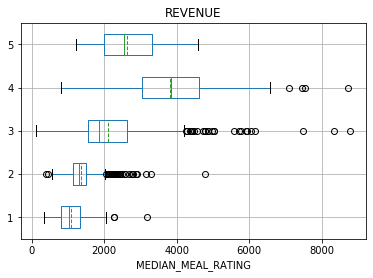

In [15]:
def categorical_boxplots(response, cat_var, data):
    """

	PARAMETERS
	----------
	response : REVENUE
	cat_var  : MEDIAN_MEAL_RATING
	data     : chefdf
	"""

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)

    plt.suptitle("")
    plt.show()


# calling the function for each categorical variable
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'MEDIAN_MEAL_RATING',
					 data     = chefdf)

Building Predictive Models

In [16]:
# creating a (Pearson) correlation matrix
df_corr = chefdf.corr().round(2)

# printing (Pearson) correlations with SalePrice
print(df_corr.loc['REVENUE'].sort_values(ascending = False)) #Order to speed up decision making

REVENUE                                  1.00
AVG_PREP_VID_TIME                        0.64
MEDIAN_MEAL_RATING                       0.61
TOTAL_MEALS_ORDERED                      0.60
change_MEDIAN_MEAL_RATING_at             0.59
TOTAL_PHOTOS_VIEWED                      0.47
MASTER_CLASSES_ATTENDED                  0.45
LARGEST_ORDER_SIZE                       0.44
out_AVG_CLICKS_PER_VISIT                 0.34
change_TOTAL_PHOTOS_VIEWED_hi            0.29
out_LARGEST_ORDER_SIZE                   0.28
change_TOTAL_MEALS_ORDERED_hi            0.27
change_UNIQUE_MEALS_PURCH_at             0.21
change_AVG_PREP_VID_TIME_hi              0.18
out_UNIQUE_MEALS_PURCH                   0.17
change_UNIQUE_MEALS_PURCH_hi             0.17
out_AVG_PREP_VID_TIME                    0.14
AVG_TIME_PER_SITE_VISIT                  0.14
CONTACTS_W_CUSTOMER_SERVICE              0.10
change_AVG_TIME_PER_SITE_VISIT_hi        0.07
change_CANCELLATIONS_AFTER_NOON_at       0.04
out_AVG_TIME_PER_SITE_VISIT       

What is interesting to see is that there are both strong positive AND negative correlations! Revenue obviously has 1.00 correlation with itself and should definitely not be used in the model. 

Strong positive correlations with REVENUE (>0.6) can be found with AVG_PREP_VID_TIME (=0.64), MEDIAN_MEAL_RATING (=0.61), TOTAL_MEALS_ORDERED (=0.60).

Moderate positive correlations with revenue (>0.4) can be found with 
TOTAL_PHOTOS_VIEWED (=0.47), MASTER_CLASSES_ATTENDED (=0.45), LARGEST_ORDER_SIZE (=0.44).

Moderately strong negative correlations (=<-0.55) can be found with
change_AVG_CLICKS_PER_VISIT_hi (=-0.50), AVG_CLICKS_PER_VISIT (=-0.55).

Other influential negative correlations can be found as: 
change_CONTACTS_W_CUSTOMER_SERVICE_hi (=-0.36)
change_TOTAL_PHOTOS_VIEWED_at (=-0.37).

The feature rich dataset will be saved below.

In [17]:
# Saving feature-rich dataset in Excel
chefdf.to_excel('chefdf_feature_rich.xlsx',
                  index = False)

<h3>Pearson correlation</h3><br>

In [18]:
# Make a copy of the feature rich dataset
chefdf_copy = chefdf.copy()

# The revenue will be dropped from the dataset as it is not relevant for predicting itself.
chefdf_copy = chefdf_copy.drop('REVENUE', axis = 1)

# Each explanatory variable will be formatted for statsmodels
for val in chefdf_copy:
    print(f"chefdf['{val}'] +")

chefdf['CROSS_SELL_SUCCESS'] +
chefdf['NAME'] +
chefdf['EMAIL'] +
chefdf['FIRST_NAME'] +
chefdf['FAMILY_NAME'] +
chefdf['TOTAL_MEALS_ORDERED'] +
chefdf['UNIQUE_MEALS_PURCH'] +
chefdf['CONTACTS_W_CUSTOMER_SERVICE'] +
chefdf['PRODUCT_CATEGORIES_VIEWED'] +
chefdf['AVG_TIME_PER_SITE_VISIT'] +
chefdf['MOBILE_NUMBER'] +
chefdf['CANCELLATIONS_BEFORE_NOON'] +
chefdf['CANCELLATIONS_AFTER_NOON'] +
chefdf['TASTES_AND_PREFERENCES'] +
chefdf['PC_LOGINS'] +
chefdf['MOBILE_LOGINS'] +
chefdf['WEEKLY_PLAN'] +
chefdf['EARLY_DELIVERIES'] +
chefdf['LATE_DELIVERIES'] +
chefdf['PACKAGE_LOCKER'] +
chefdf['REFRIGERATED_LOCKER'] +
chefdf['FOLLOWED_RECOMMENDATIONS_PCT'] +
chefdf['AVG_PREP_VID_TIME'] +
chefdf['LARGEST_ORDER_SIZE'] +
chefdf['MASTER_CLASSES_ATTENDED'] +
chefdf['MEDIAN_MEAL_RATING'] +
chefdf['AVG_CLICKS_PER_VISIT'] +
chefdf['TOTAL_PHOTOS_VIEWED'] +
chefdf['out_TOTAL_MEALS_ORDERED'] +
chefdf['out_UNIQUE_MEALS_PURCH'] +
chefdf['out_CONTACTS_W_CUSTOMER_SERVICE'] +
chefdf['out_AVG_TIME_PER_SITE_VISIT']

In the code below a full model will be built, this will show us how our explanatory variables perform.

In [19]:
lm_full = smf.ols(formula = """ chefdf['REVENUE']~
                                chefdf['CROSS_SELL_SUCCESS'] +
                                chefdf['TOTAL_MEALS_ORDERED'] +
                                chefdf['UNIQUE_MEALS_PURCH'] +
                                chefdf['CONTACTS_W_CUSTOMER_SERVICE'] +
                                chefdf['PRODUCT_CATEGORIES_VIEWED'] +
                                chefdf['AVG_TIME_PER_SITE_VISIT'] +
                                chefdf['MOBILE_NUMBER'] +
                                chefdf['CANCELLATIONS_BEFORE_NOON'] +
                                chefdf['CANCELLATIONS_AFTER_NOON'] +
                                chefdf['TASTES_AND_PREFERENCES'] +
                                chefdf['PC_LOGINS'] +
                                chefdf['MOBILE_LOGINS'] +
                                chefdf['WEEKLY_PLAN'] +
                                chefdf['EARLY_DELIVERIES'] +
                                chefdf['LATE_DELIVERIES'] +
                                chefdf['PACKAGE_LOCKER'] +
                                chefdf['REFRIGERATED_LOCKER'] +
                                chefdf['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                chefdf['AVG_PREP_VID_TIME'] +
                                chefdf['LARGEST_ORDER_SIZE'] +
                                chefdf['MASTER_CLASSES_ATTENDED'] +
                                chefdf['MEDIAN_MEAL_RATING'] +
                                chefdf['AVG_CLICKS_PER_VISIT'] +
                                chefdf['TOTAL_PHOTOS_VIEWED'] +
                                chefdf['out_TOTAL_MEALS_ORDERED'] +
                                chefdf['out_UNIQUE_MEALS_PURCH'] +
                                chefdf['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                chefdf['out_AVG_TIME_PER_SITE_VISIT'] +
                                chefdf['out_WEEKLY_PLAN'] +
                                chefdf['out_EARLY_DELIVERIES'] +
                                chefdf['out_LATE_DELIVERIES'] +
                                chefdf['out_AVG_PREP_VID_TIME'] +
                                chefdf['out_LARGEST_ORDER_SIZE'] +
                                chefdf['out_MEDIAN_MEAL_RATING'] +
                                chefdf['out_AVG_CLICKS_PER_VISIT'] +
                                chefdf['change_TOTAL_MEALS_ORDERED_hi'] +
                                chefdf['change_UNIQUE_MEALS_PURCH_hi'] +
                                chefdf['change_TOTAL_PHOTOS_VIEWED_hi'] +
                                chefdf['change_CONTACTS_W_CUSTOMER_SERVICE_hi'] +
                                chefdf['change_AVG_TIME_PER_SITE_VISIT_hi'] +
                                chefdf['change_CANCELLATIONS_BEFORE_NOON_hi'] +
                                chefdf['change_LATE_DELIVERIES_hi'] +
                                chefdf['change_AVG_PREP_VID_TIME_hi'] +
                                chefdf['change_LARGEST_ORDER_SIZE_hi'] +
                                chefdf['change_AVG_CLICKS_PER_VISIT_hi'] +
                                chefdf['change_MOBILE_NUMBER_at'] +
                                chefdf['change_TOTAL_PHOTOS_VIEWED_at'] +
                                chefdf['change_WEEKLY_PLAN_at'] +
                                chefdf['change_UNIQUE_MEALS_PURCH_at'] +
                                chefdf['change_MEDIAN_MEAL_RATING_at'] +
                                chefdf['change_CANCELLATIONS_AFTER_NOON_at']""",
                                data = chefdf)


# Telling Python to run the data through the blueprint
results_full = lm_full.fit()


# Printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      chefdf['REVENUE']   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     134.6
Date:                Sat, 07 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:41:06   Log-Likelihood:                -14996.
No. Observations:                1946   AIC:                         3.009e+04
Df Residuals:                    1896   BIC:                         3.037e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                        -651.2289    307.773     -2.116      0.034   -1254.839     -47.619
chefdf['CROSS_SELL_SUCCESS']                      -71.8169     30.828     -2.330      0.020    -132.277     -11.357
chefdf['TOTAL_MEALS_ORDERED']                       4.5919      0.353     13.012      0.000       3.900       5.284
chefdf['UNIQUE_MEALS_PURCH']                        6.0094      5.990      1.003      0.316      -5.739      17.758
chefdf['CONTACTS_W_CUSTOMER_SERVICE']             109.1003      9.283     11.752      0.000      90.894     127.307
chefdf['PRODUCT_CATEGORIES_VIEWED']                 4.3335      4.131      1.049      0.294      -3.768      12.435
chefdf['AVG_TIME_PER_SITE_VISIT']                   0.6147      0.311      1.979      0.048       0.006       1.224
chefdf['MOBILE_NUMBER']                            18.6254     19.269      0.967      0.334     -19.166      56.417
chefdf['CANCELLATIONS_BEFORE_NOON']                -2.3782      8.448     -0.282      0.778     -18.946      14.190
chefdf['CANCELLATIONS_AFTER_NOON']                 82.9867     84.143      0.986      0.324     -82.036     248.009
chefdf['TASTES_AND_PREFERENCES']                   24.7480     27.784      0.891      0.373     -29.743      79.239
chefdf['PC_LOGINS']                                -2.1661     21.513     -0.101      0.920     -44.358      40.026
chefdf['MOBILE_LOGINS']                           -11.8443     23.817     -0.497      0.619     -58.554      34.865
chefdf['WEEKLY_PLAN']                              -1.3025      2.178     -0.598      0.550      -5.573       2.968
chefdf['EARLY_DELIVERIES']                          0.2554      9.121      0.028      0.978     -17.633      18.144
chefdf['LATE_DELIVERIES']                          18.7398      7.260      2.581      0.010       4.502      32.978
chefdf['PACKAGE_LOCKER']                            6.4858     29.885      0.217      0.828     -52.124      65.096
chefdf['REFRIGERATED_LOCKER']                     -36.7239     45.037     -0.815      0.415    -125.052      51.604
chefdf['FOLLOWED_RECOMMENDATIONS_PCT']              0.7187      0.535      1.344      0.179      -0.330       1.768
chefdf['AVG_PREP_VID_TIME']                         8.4838      0.554     15.326      0.000       7.398       9.569
chefdf['LARGEST_ORDER_SIZE']                      -80.4114     15.506     -5.186      0.000    -110.822     -50.001
chefdf['MASTER_CLASSES_ATTENDED']                 138.9466     23.071      6.022      0.000      93.699     184.195
chefdf['MEDIAN_MEAL_RATING']                      103.7167     40.614      2.554      0.011      24.063     183.370
chefdf['AVG_CLICKS_PER_VISIT']                     -5.5435     12.0

In the code below a full model will be built with the best P-values, this will show us how our explanatory variables perform.

In [20]:
lm_full = smf.ols(formula = """ chefdf['REVENUE']~
                                chefdf['TOTAL_MEALS_ORDERED'] +
                                chefdf['CONTACTS_W_CUSTOMER_SERVICE'] +
                                chefdf['AVG_TIME_PER_SITE_VISIT'] +
                                chefdf['LATE_DELIVERIES'] +
                                chefdf['AVG_PREP_VID_TIME'] +
                                chefdf['LARGEST_ORDER_SIZE'] +
                                chefdf['MASTER_CLASSES_ATTENDED'] +
                                chefdf['MEDIAN_MEAL_RATING'] +
                                chefdf['TOTAL_PHOTOS_VIEWED'] +
                                chefdf['out_CONTACTS_W_CUSTOMER_SERVICE'] +
                                chefdf['out_LATE_DELIVERIES'] +
                                chefdf['out_AVG_PREP_VID_TIME'] +
                                chefdf['change_TOTAL_MEALS_ORDERED_hi'] +
                                chefdf['change_TOTAL_PHOTOS_VIEWED_hi'] +
                                chefdf['change_CONTACTS_W_CUSTOMER_SERVICE_hi'] +
                                chefdf['change_AVG_PREP_VID_TIME_hi'] +
                                chefdf['change_LARGEST_ORDER_SIZE_hi'] +
                                chefdf['change_UNIQUE_MEALS_PURCH_at'] +
                                chefdf['change_MEDIAN_MEAL_RATING_at']""",
                                data = chefdf)


# Telling Python to run the data through the blueprint
results_full = lm_full.fit()


# Printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      chefdf['REVENUE']   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     347.6
Date:                Sat, 07 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:41:06   Log-Likelihood:                -15007.
No. Observations:                1946   AIC:                         3.005e+04
Df Residuals:                    1926   BIC:                         3.017e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                        -632.9443     87.090     -7.268      0.000    -803.745    -462.144
chefdf['TOTAL_MEALS_ORDERED']                       4.5612      0.338     13.475      0.000       3.897       5.225
chefdf['CONTACTS_W_CUSTOMER_SERVICE']             109.3304      9.192     11.894      0.000      91.303     127.358
chefdf['AVG_TIME_PER_SITE_VISIT']                   0.4764      0.216      2.208      0.027       0.053       0.899
chefdf['LATE_DELIVERIES']                          18.5174      6.779      2.731      0.006       5.222      31.813
chefdf['AVG_PREP_VID_TIME']                         8.5392      0.543     15.718      0.000       7.474       9.605
chefdf['LARGEST_ORDER_SIZE']                      -81.7839     14.294     -5.722      0.000    -109.817     -53.751
chefdf['MASTER_CLASSES_ATTENDED']                 141.2774     22.756      6.208      0.000      96.648     185.907
chefdf['MEDIAN_MEAL_RATING']                      115.5402     24.491      4.718      0.000      67.508     163.572
chefdf['TOTAL_PHOTOS_VIEWED']                       0.5984      0.106      5.629      0.000       0.390       0.807
chefdf['out_CONTACTS_W_CUSTOMER_SERVICE']         176.2816     39.779      4.432      0.000      98.267     254.296
chefdf['out_LATE_DELIVERIES']                    -124.4090     60.995     -2.040      0.042    -244.033      -4.785
chefdf['out_AVG_PREP_VID_TIME']                   123.8723     29.473      4.203      0.000      66.070     181.675
chefdf['change_TOTAL_MEALS_ORDERED_hi']          -270.1987    118.083     -2.288      0.022    -501.782     -38.615
chefdf['change_TOTAL_PHOTOS_VIEWED_hi']          -196.3039     87.187     -2.252      0.024    -367.295     -25.312
chefdf['change_CONTACTS_W_CUSTOMER_SERVICE_hi'] -1121.3410     77.115    -14.541      0.000   -1272.578    -970.104
chefdf['change_AVG_PREP_VID_TIME_hi']            -463.5507    145.496     -3.186      0.001    -748.897    -178.204
chefdf['change_LARGEST_ORDER_SIZE_hi']           -605.5305    163.075     -3.713      0.000    -925.353    -285.708
chefdf['change_UNIQUE_MEALS_PURCH_at']           1301.7138     45.224     28.784      0.000    1213.021    1390.406
chefdf['change_MEDIAN_MEAL_RATING_at']            772.7060     52.201     14.802      0.000     670.329     875.083
==============================================================================
Omnibus:                      677.493   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10254.090
Skew:                           1.215   Prob(JB):                         0.00
Kurtosis:                      13.980   Cond. No.                     3.60e+03
====================

It should be mentioned that some features have a strong influence. For instance, the model above shows that for change_CONTACTS_W_SERVICE_hi every increase by one unit, our revenue decreases 1121.34 units. This showcases that the company best avoids creating scenarios where the customer is required to (often) contact customer services. We can also see for chefdf['change_MEDIAN_MEAL_RATING_at'] that at the threshold that was set (=4), every increase of one unit can lead to an increase of revenue by 772 units of revenue. 

The model showcases which features have higher contributing power to our revenue but it should also be kept in mind that a model is just that, a model. Real life scenario's may deviate from what models predict due to unforseen circumstances. We can, however, optimize our real life revenue based on the info that is attained from our model.

A few noteworthy insights from the full model include

Documentation of removed features and their P-values.

The above model shows that there are some features that are less significant and the R-square equalled 0.777 originally with all features present in the model. In order to make our model more significant and less prone to generalization, certain features were removed. Features with high P values that are statistically insignificant and were removed in the following order include in folowing order with their P-values:

-chefdf['EARLY_DELIVERIES']	                    P-val	0.978

-chefdf['PC_LOGINS']	                        P-val	0.922

-chefdf['out_PRODUCT_CATEGORIES_VIEWED']	    P-val	0.995

-chefdf['change_CANCELLATIONS_BEFORE_NOON_hi']	P-val	0.865

-chefdf['change_AVG_TIME_PER_SITE_VISIT_hi']	P-val	0.834

-chefdf['PACKAGE_LOCKER']	                    P-val	0.827

-chefdf['CANCELLATIONS_BEFORE_NOON']	        P-val	0.820

-chefdf['change_LATE_DELIVERIES_hi']	        P-val	0.806

-chefdf['out_REFRIGERATED_LOCKER']	            P-val	0.868

-chefdf['change_TOTAL_PHOTOS_VIEWED_at']	    P-val	0.797

-chefdf['EARLY_DELIVERIES']	                    P-val	0.763

-chefdf['change_TOTAL_MEALS_ORDERED_at']	    P-val	0.851

-chefdf['out_AVG_CLICKS_PER_VISIT']	            P-val	0.747

-chefdf['out_LARGEST_ORDER_SIZE']	            P-val	0.716

-chefdf['AVG_CLICKS_PER_VISIT']	                P-val	0.700

-chefdf['MOBILE_LOGINS']	                    P-val	0.624	

-chefdf['out_MEDIAN_MEAL_RATING']	            P-val	0.559

-chefdf['out_AVG_TIME_PER_SITE_VISIT']	        P-val	0.545

-chefdf['REFRIGERATED_LOCKER']	                P-val	0.412 (After this removal: R²= 0.776 and R-adjusted=0.773)

-chefdf['WEEKLY_PLAN']	                        P-val	0.529

-chefdf['TASTES_AND_PREFERENCES']	            P-val	0.357

-chefdf['CANCELLATIONS_AFTER_NOON']	            P-val	0.343

-chefdf['change_CANCELLATIONS_AFTER_NOON_at']	P-val	0.388

-chefdf['change_UNIQUE_MEALS_PURCH_hi']	        P-val	0.353

-chefdf['out_UNIQUE_MEALS_PURCH']	            P-val	0.353

-chefdf['change_MOBILE_NUMBER_at']              P-val	0.327

-chefdf['MOBILE_NUMBER']	                    P-val	0.327

-chefdf['PRODUCT_CATEGORIES_VIEWED']	        P-val	0.275

-chefdf['out_TOTAL_MEALS_ORDERED']	            P-val	0.299

-chefdf['UNIQUE_MEALS_PURCH']	                P-val	0.219 (After this removal: R²= 0.775 and R-adjusted=0.773)

-chefdf['FOLLOWED_RECOMMENDATIONS_PCT']	        P-val	0.216	

-chefdf['change_AVG_CLICKS_PER_VISIT_hi']	    P-val	0.211

-chefdf['out_WEEKLY_PLAN']	                    P-val	0.085 (After this removal: R²= 0.775 and R-adjusted=0.772)

-chefdf['change_WEEKLY_PLAN_at']	            P-val	0.197	

-chefdf['CROSS_SELL_SUCCESS']	                P-val	0.069 (After this removal: R²= 0.774 and R-adjusted=0.772)



<h3> Modelling </h3><br>

The data is prepared and the train test split is performed in the code below.

The x-variables that will be used in the model to predict the y-variable REVENUE are declared below.

**Note:**
Following variables have been removed to avoid overfitting;
'AVG_TIME_PER_SITE_VISIT'
'TOTAL_PHOTOS_VIEWED'
'out_CONTACTS_W_CUSTOMER_SERVICE'
'change_TOTAL_PHOTOS_VIEWED_hi'

In [21]:
x_variables = ['TOTAL_MEALS_ORDERED',
               'CONTACTS_W_CUSTOMER_SERVICE',
               'LATE_DELIVERIES',
               'AVG_PREP_VID_TIME',
               'LARGEST_ORDER_SIZE',
               'MASTER_CLASSES_ATTENDED',
               'MEDIAN_MEAL_RATING',
               'out_LATE_DELIVERIES',
               'out_AVG_PREP_VID_TIME',
               'change_TOTAL_MEALS_ORDERED_hi',
               'change_CONTACTS_W_CUSTOMER_SERVICE_hi',
               'change_AVG_PREP_VID_TIME_hi',
               'change_LARGEST_ORDER_SIZE_hi',
               'change_UNIQUE_MEALS_PURCH_at',
               'change_MEDIAN_MEAL_RATING_at']


In the code below we modelling was performed using scikit-learn

In [22]:
# Applying modelin scikit-learn

# Preparing x-variables
chefdf_data = chefdf.loc[:,x_variables]

# Preparing response variable
chefdf_target = chefdf.loc[:,'REVENUE']

# Running train/test split again
X_train,X_test,y_train,y_test = train_test_split(
                chefdf_data, chefdf_target,test_size = 0.25, random_state = 222)

In [23]:
#Linear Regression

# Instantiating Linear Regression as model 
lr = LinearRegression()

# Fitting to the training data
lr_fit = lr.fit(X_train, y_train)

# Predicting
lr_pred = lr_fit.predict(X_test)

# Scoring the results for evaluation
print('Training Score:', lr.score(X_train, y_train).round(3))
print('Testing Score:',  lr.score(X_test, y_test).round(3))

# Saving data for future use
lr_train_score = lr.score(X_train, y_train).round(3)
lr_test_score  = lr.score(X_test, y_test).round(3)

Training Score: 0.781
Testing Score: 0.724


In [24]:
# Ridge regression model 

# Instantiating Ridge Regression as model 
ridge_model = sklearn.linear_model.Ridge()

# Fitting to the training data
ridge_fit = ridge_model.fit(X_train, y_train)

# Predicting
ridge_pred = ridge_model.predict(X_test)

#Printing the data
print('Training Score:', ridge_model.score(X_train, y_train).round(3))
print('Testing Score:',  ridge_model.score(X_test, y_test).round(3))

# Saving data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(3)
ridge_test_score  = ridge_model.score(X_test, y_test).round(3)

Training Score: 0.781
Testing Score: 0.724


In [25]:
# Lasso regression model

# Instantiating Lasso Regression as model 
lasso_model = sklearn.linear_model.Lasso()

# Fitting to the training data
lasso_fit = lasso_model.fit(X_train, y_train)

# Predicting
lasso_pred = lasso_model.predict(X_test)

# Printing the data
print('Training Score:', lasso_model.score(X_train, y_train).round(3))
print('Testing Score:',  lasso_model.score(X_test, y_test).round(3))

# Saving data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(3)
lasso_test_score  = lasso_model.score(X_test, y_test).round(3)

Training Score: 0.781
Testing Score: 0.723


In [26]:
# Elastic Net 

# Instantiating Elastic as model
Elastic_model = sklearn.linear_model.ElasticNet() 

# Fitting to the training data
Elastic_fit = Elastic_model.fit(X_train, y_train)

# Predicting
Elastic_model_pred = Elastic_model.predict(X_test)

# Printing the data
print('Training Score:', Elastic_model.score(X_train, y_train).round(3))
print('Testing Score:',  Elastic_model.score(X_test, y_test).round(3))

# Saving data for future use
Elastic_model_train_score = Elastic_model.score(X_train, y_train).round(3)
Elastic_model_test_score  = Elastic_model.score(X_test, y_test).round(3)

Training Score: 0.64
Testing Score: 0.574


An ARD regression model was used as well, this offered R²=0.7884, R=0.7259. The code for this model was dropped as it consumed mech computing power.

In [27]:
# Huber Regression

# Instantiating Huber Regression as model
HB_model = sklearn.linear_model.HuberRegressor() 

# Fitting to the training data
HB_fit = HB_model.fit(X_train,y_train)

# Predicting
HB_pred = HB_fit.predict(X_test)

# Printing the data
print('Training Score:', HB_model.score(X_train,y_train).round(3))
print('Testing Score:',  HB_model.score(X_test,y_test).round(3))

# Saving scoring data for future use
HB_train_score = HB_model.score(X_train,y_train).round(3)
HB_test_score  = HB_model.score(X_test,y_test).round(3)

Training Score: 0.755
Testing Score: 0.699


C:\Users\matth\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


**KNeighbors**

In [28]:
# Instantiating a StandardScaler() object
scaler = StandardScaler()

# Fitting the scaler with chefdf
scaler.fit(chefdf_data)

# Transforming data after fit (interpreting the data as below(negative) or above(positive) average)
X_scaled = scaler.transform(chefdf_data)

# Converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)

#Indicating columns for each variable
X_scaled_df.columns = chefdf_data.columns

In [29]:
#Train Test split with standardized data

X_train, X_test, y_train,y_test = train_test_split(
            X_scaled_df,
            chefdf_target,
            test_size = 0.25,
            random_state = 222)

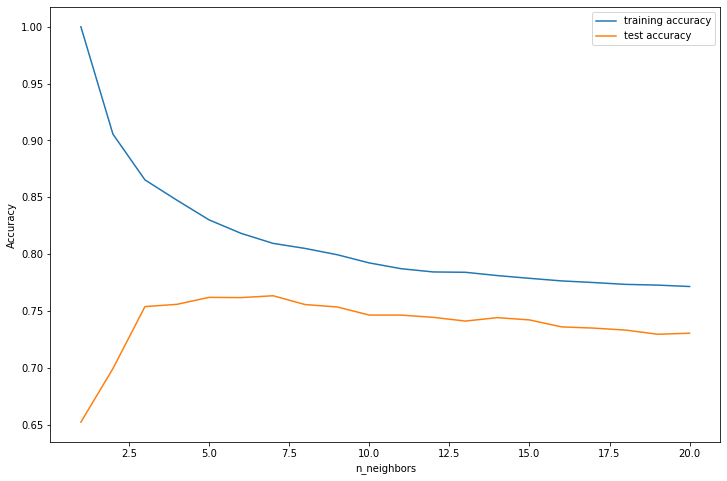

The optimal number of neighbors is 7


In [30]:
# Creating lists for training set accuracy and test set accuracy

training_accuracy = []
test_accuracy = []

# Bilding a visualization of 1 to 21 neighbors
neighbors_settings = range(1, 21)

for n_neighbors in neighbors_settings:
    
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

# Plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

# Finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [31]:
# Instantiate a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                   n_neighbors = opt_neighbors)

# Fitting model based on the training data
knn_stand.fit(X_train, y_train)

# Predicting
knn_stand_pred = knn_stand.predict(X_test)

# Scoring
KNN_training_score=(knn_stand.score(X_train,y_train).round(3))
KNN_test_score=(knn_stand.score(X_test, y_test).round(3))

#Printing the results
print('Training Score:', knn_stand.score(X_train,y_train).round(3))
print('Testing Score:',  knn_stand.score(X_test, y_test).round(3))

# Saving data for future use
knn_stand_score_train =  knn_stand.score(X_train,y_train).round(3)
knn_stand_score_test  = knn_stand.score(X_test, y_test).round(3)

Training Score: 0.809
Testing Score: 0.763


In [32]:
# Comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
Ridge      {ridge_train_score}           {ridge_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
EM         {Elastic_model_train_score}           {Elastic_model_test_score}
Haber      {HB_train_score}           {HB_test_score}
KNN        {KNN_training_score}           {KNN_test_score}
""")


Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.781           0.724
Ridge      0.781           0.724
Lasso      0.781           0.723
EM         0.64           0.574
Haber      0.755           0.699
KNN        0.809           0.763

